In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#mig_city is population by citizenship and country of birth - cities (includes countries) and greater cities
mig_city = pd.read_csv('../data/city_statistics/urb_cpopcb_1_Data.csv', encoding="latin-1")
print(mig_city.shape)
mig_city.head(60)

(53700, 5)


,TIME,CITIES,INDIC_UR,Value,Flag and Footnotes
0,2010,Belgium,Nationals,"9,782,239",NaN
1,2010,Belgium,EU foreigners,"714,500",NaN
2,2010,Belgium,Non-EU foreigners,"343,166",NaN
3,2010,Belgium,Native-born,:,NaN
4,2010,Belgium,Foreign-born,:,NaN
5,2010,Bruxelles / Brussel,Nationals,"762,468",NaN
6,2010,Bruxelles / Brussel,EU foreigners,"207,036",NaN
7,2010,Bruxelles / Brussel,Non-EU foreigners,"120,034",NaN
8,2010,Bruxelles / Brussel,Native-born,"651,236",NaN
9,2010,Bruxelles / Brussel,Foreign-born,"438,302",NaN


In [3]:
mig_city.isnull().sum()

TIME                      0
CITIES                    0
INDIC_UR                  0
Value                     0
Flag and Footnotes    46476
dtype: int64

In [4]:
mig_city1 = mig_city.drop(columns='Flag and Footnotes')
mig_city1.dtypes

TIME         int64
CITIES      object
INDIC_UR    object
Value       object
dtype: object

In [5]:
mig_city1['Value'] = mig_city1['Value'].str.replace(',', '')
mig_city1['Value'] = mig_city1['Value'].str.replace(':', '0')
#mig_city2['Value'].replace('', np.nan, inplace=True)
#mig_city2['Value'] = pd.to_numeric(mig_city2['Value'])
mig_city1['Value'] = mig_city1['Value'].astype(int)
mig_city1.dtypes

TIME         int64
CITIES      object
INDIC_UR    object
Value        int64
dtype: object

In [6]:
mig_city1.head()

,TIME,CITIES,INDIC_UR,Value
0,2010,Belgium,Nationals,9782239
1,2010,Belgium,EU foreigners,714500
2,2010,Belgium,Non-EU foreigners,343166
3,2010,Belgium,Native-born,0
4,2010,Belgium,Foreign-born,0


In [7]:
sum_cities = mig_city1.groupby(['TIME','CITIES','INDIC_UR'])['Value'].sum()
sum_cities.head(60)
sum_cities_upd = sum_cities.unstack()
sum_cities_upd.head(60)


INDIC_UR                    EU foreigners  Foreign-born  Nationals  \
TIME CITIES                                                          
2010 's-Hertogenbosch                1938             0     134097   
     A Coruña                        2731         23949     233703   
     Aachen                         11900         56700     216252   
     Aalborg                         4145             0     188535   
     Aberdeen City                      0             0          0   
     Acireale                         398             0      52043   
     Adana                              0             0          0   
     Aix-en-Provence                 2918         25295     132566   
     Ajaccio                            0             0          0   
     Alba Iulia                         0             0          0   
     Albacete                        2575         13795     158596   
     Albi                               0             0          0   
     Alcalá de Guadaíra                 0             0          0   
     Alcalá de Henares              27551         44716     161450   
     Alcobendas                      5642         22900      91393   
     Alcorcón                        6247         24560     146987   
     Alcoy                              0             0          0   
     Alessandria                        0             0          0   
     Algeciras                       1499          9971     109418   
     Alicante/Alacant               15320         61016     284087   
     Almada                             0             0          0   
     Almelo                           707             0      69462   
     Almere                          3321             0     178743   
     Almería                         6136         22869     170010   
     Alphen aan den Rijn             1027             0      70209   
     Altamura                           0             0          0   
     Alytus                             0             0          0   
     Amadora                            0             0          0   
     Amersfoort                      1388             0     139324   
     Amiens                          1085         13092     130414   
     Ancona                          2361             0      91813   
     Andria                             0             0          0   
     Angers                          1183         15755     163009   
     Angoulême                          0             0          0   
     Ankara                             0             0          0   
     Annecy                          3520         16083     110002   
     Annemasse                       2198         15676      48602   
     Antalya                            0             0          0   
     Antwerpen                      34779             0     404149   
     Anzio                              0             0          0   
     Apeldoorn                       1019             0     152494   
     Arad                               0             0          0   
     Arezzo                             0             0          0   
     Argenteuil - Bezons                0             0          0   
     Arras                            484          3622      66775   
     Arrecife                        2143         16211      44339   
     Aschaffenburg                   1800         17000      58285   
     Ashford                            0             0          0   
     Assen                              0             0          0   
     Asti                            1631             0      67712   
     Athina                             0             0          0   
     Athina (greater city)              0             0          0   
     Aubagne                            0             0          0   
     Augsburg                       12400         76500     218467   
     Austria                            0             0          0   
     Aveir

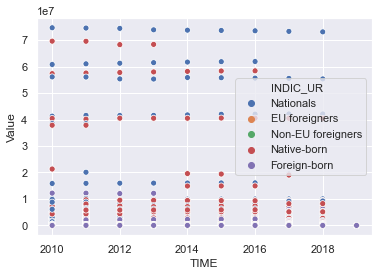

In [8]:
sns.scatterplot(mig_city1.TIME, mig_city1.Value, hue='INDIC_UR', data=mig_city1)

In [9]:
mig_employ = pd.read_csv('../data/employment/lfsa_pganws_1_Data.csv')
mig_employ

,TIME,GEO,SEX,CITIZEN,AGE,WSTATUS,UNIT,Value,Flag and Footnotes
0,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Population,Thousand,"6,741.7",NaN
1,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Active persons,Thousand,"5,157.9",NaN
2,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Employed persons,Thousand,"4,484.4",NaN
3,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Unemployed persons,Thousand,673.5,NaN
4,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Inactive persons,Thousand,"1,583.8",NaN
...,...,...,...,...,...,...,...,...,...
52645,2019,Turkey,Females,Total,From 15 to 64 years,Population,Thousand,"27,008.5",NaN
52646,2019,Turkey,Females,Total,From 15 to 64 years,Active persons,Thousand,"10,440.0",NaN
52647,2019,Turkey,Females,Total,From 15 to 64 years,Employed persons,Thousand,"8,693.7",NaN
52648,2019,Turkey,Females,Total,From 15 to 64 years,Unemployed persons,Thousand,"1,746.3",NaN


In [10]:
mig_employ.dtypes

TIME                   int64
GEO                   object
SEX                   object
CITIZEN               object
AGE                   object
WSTATUS               object
UNIT                  object
Value                 object
Flag and Footnotes    object
dtype: object

In [11]:
mig_employ.isnull().sum()

TIME                      0
GEO                       0
SEX                       0
CITIZEN                   0
AGE                       0
WSTATUS                   0
UNIT                      0
Value                     0
Flag and Footnotes    40799
dtype: int64

In [12]:
mig_employ1 = mig_employ.drop(['Flag and Footnotes','UNIT'], axis=1)
mig_employ1

,TIME,GEO,SEX,CITIZEN,AGE,WSTATUS,Value
0,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Population,"6,741.7"
1,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Active persons,"5,157.9"
2,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Employed persons,"4,484.4"
3,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Unemployed persons,673.5
4,2010,European Union - 27 countries (from 2020),Total,EU27 countries (from 2020) except reporting co...,From 15 to 64 years,Inactive persons,"1,583.8"
...,...,...,...,...,...,...,...
52645,2019,Turkey,Females,Total,From 15 to 64 years,Population,"27,008.5"
52646,2019,Turkey,Females,Total,From 15 to 64 years,Active persons,"10,440.0"
52647,2019,Turkey,Females,Total,From 15 to 64 years,Employed persons,"8,693.7"
52648,2019,Turkey,Females,Total,From 15 to 64 years,Unemployed persons,"1,746.3"


In [13]:
mig_employ1.dtypes

TIME        int64
GEO        object
SEX        object
CITIZEN    object
AGE        object
WSTATUS    object
Value      object
dtype: object

In [14]:
mig_employ1.head(60)
mig_employ1['Value'] = mig_employ1['Value'].str.replace(',', '')
mig_employ1['Value'] = mig_employ1['Value'].str.replace(':', '0')
mig_employ1['Value'] = pd.to_numeric(mig_employ1['Value'])
mig_city1.dtypes

TIME         int64
CITIES      object
INDIC_UR    object
Value        int64
dtype: object

In [15]:
mig_employ2 = mig_employ1.groupby(['TIME','GEO','WSTATUS','CITIZEN'])['Value'].agg('sum')
mig_employ2 = mig_employ2.reset_index()
mig_employ2.head(60)

,TIME,GEO,WSTATUS,CITIZEN,Value
0,2010,Austria,Active persons,EU15 countries (1995-2004) except reporting co...,219.6
1,2010,Austria,Active persons,EU27 countries (from 2020) except reporting co...,446.1
2,2010,Austria,Active persons,EU28 countries (2013-2020) except reporting co...,455.8
3,2010,Austria,Active persons,Foreign country,927.4
4,2010,Austria,Active persons,Non-EU15 countries (1995-2004) nor reporting c...,707.8
5,2010,Austria,Active persons,Non-EU27 countries (from 2020) nor reporting c...,481.4
6,2010,Austria,Active persons,Non-EU28 countries (2013-2020) nor reporting c...,471.6
7,2010,Austria,Active persons,Reporting country,7366.7
8,2010,Austria,Active persons,Total,8294.1
9,2010,Austria,Employed persons,EU15 countries (1995-2004) except reporting co...,209.0


In [16]:
time_country = {}

for index,row in mig_employ2.iterrows():
    key = str(row['TIME'])+row['GEO']
    if key not in time_country:
        time_country[key]={}
    if row['WSTATUS'] == 'Employed persons' and row['CITIZEN'] == 'Reporting country':
        time_country[key]['Employed nationals']=row['Value']
        
    if row['WSTATUS'] == 'Unemployed persons' and row['CITIZEN'] == 'Reporting country':
        time_country[key]['Unemployed nationals']=row['Value']
        
    if row['WSTATUS'] == 'Employed persons' and row['CITIZEN'] == 'Foreign country':
        time_country[key]['Employed foreigners']=row['Value']
        
    if row['WSTATUS'] == 'Unemployed persons' and row['CITIZEN'] == 'Foreign country':
        time_country[key]['Unemployed foreigners']=row['Value']

for key in time_country:
    row = time_country[key]
    row ['Year']=int(key[0:4])
    row ['Country']=key[4:]
    row['Active nationals']=row['Employed nationals']+row['Unemployed nationals']
    row['Active foreigners']=row['Employed foreigners']+row['Unemployed foreigners']
    row['Active population']=row['Active nationals']+row['Active foreigners']
    
    row['Unemployed population']=row['Unemployed nationals']+row['Unemployed foreigners']
    row['Employed population']=row['Employed nationals']+row['Employed foreigners']

    if row ['Active population'] != 0:
        row['Unemployment rate total']=(row['Unemployed nationals']+row['Unemployed foreigners'])/row['Active population']
    if row ['Active nationals'] != 0:
        row['Unemployment rate nationals']=row['Unemployed nationals']/row['Active nationals']
    if row ['Active foreigners'] != 0:
        row['Unemployment rate foreigners']=row['Unemployed foreigners']/row['Active foreigners']
        
    last_year=row['Year']-1
    last_year_key=str(last_year)+row['Country']
    
    columns=[
        'Active population',
        'Active nationals',
        'Active foreigners',
        'Unemployed population',
        'Unemployed nationals',
        'Unemployed foreigners',
        'Employed population',
        'Employed nationals',
        'Employed foreigners',
    ]
    
    for column in columns:
        if last_year_key in time_country:
            row['Change ' + column]=row[column]-time_country[last_year_key][column]
        else:
            # no data for previous year
            row['Change ' + column]=0
    if last_year_key in time_country and time_country[last_year_key]['Active population'] > 0:
        row['Net increase active foreigners as % of last year active population']=row['Change Active foreigners']/time_country[last_year_key]['Active population']
    else:
        row['Net increase active foreigners as % of last year active population']=0

#time_country

In [37]:
time_country = pd.DataFrame.from_dict(time_country)
time_country = time_country.transpose()
time_country

,Employed foreigners,Employed nationals,Unemployed foreigners,Unemployed nationals,Year,Country,Active nationals,Active foreigners,Active population,Unemployed population,...,Change Active population,Change Active nationals,Change Active foreigners,Change Unemployed population,Change Unemployed nationals,Change Unemployed foreigners,Change Employed population,Change Employed nationals,Change Employed foreigners,Net increase active foreigners as % of last year active population
2010Austria,840.6,7047,86.8,319.6,2010,Austria,7366.6,927.4,8294,406.4,...,0,0,0,0,0,0,0,0,0,0
2010Belgium,761.4,8139.8,149,662,2010,Belgium,8801.8,910.4,9712.2,811,...,0,0,0,0,0,0,0,0,0,0
2010Bulgaria,3.9,6066.2,0,699.6,2010,Bulgaria,6765.8,3.9,6769.7,699.6,...,0,0,0,0,0,0,0,0,0,0
2010Croatia,6,3290.6,0,443,2010,Croatia,3733.6,6,3739.6,443,...,0,0,0,0,0,0,0,0,0,0
2010Cyprus,164,600.5,15.4,37.2,2010,Cyprus,637.7,179.4,817.1,52.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019Spain,4758.8,34377.1,1198.9,5272,2019,Spain,39649.1,5957.7,45606.8,6470.9,...,393.7,41.2,352.5,-469.5,-442.4,-27.1,863.2,483.6,379.6,0.00779641
2019Sweden,762.6,9098.6,192.8,534.2,2019,Sweden,9632.8,955.4,10588.2,727,...,113.9,22.4,91.5,57.3,47,10.3,56.6,-24.6,81.2,0.00873567
2019Switzerland,2433.4,6622,198,230.9,2019,Switzerland,6852.9,2631.4,9484.3,428.9,...,45.7,11.7,34,-31.1,-14.5,-16.6,76.8,26.2,50.6,0.00360223
2019Turkey,0,0,0,0,2019,Turkey,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
mig_employ1.to_csv('../data/employment/lfsa_pganws_1_Data_cleaned.csv')

In [22]:
time_country.to_csv('../data/employment/lfsa_pganws_1_Data_updated.csv')

In [24]:
time_country2 = time_country
time_country2.to_csv('../data/employment/lfsa_pganws_1_Data_updated2.csv')

In [26]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel

In [39]:
# DEPENDENT samples: Here we look at the mean of the differences

NL = []
DE = []
SP = []
EU = []

NL = time_country.loc[time_country['Country'] == "Netherlands"]
DE = time_country.loc[time_country['Country'] == "Germany (until 1990 former territory of the FRG)"]
SP = time_country.loc[time_country['Country'] == "Spain"]


ttest_all = ttest_rel(time_country['Unemployed nationals'], time_country['Change Active foreigners'])
ttest_NL  = ttest_rel(NL['Unemployed nationals'], NL['Change Active foreigners'])
ttest_DE  = ttest_rel(DE['Unemployed nationals'], DE['Change Active foreigners'])
ttest_SP  = ttest_rel(SP['Unemployed nationals'], SP['Change Active foreigners'])

print('all', ttest_all)
print('NL', ttest_NL)
print('DE', ttest_DE)
print('SP', ttest_SP)

#P-value is very small so we reject the null hypothesis 

all Ttest_relResult(statistic=8.671265940560282, pvalue=1.1724553155965142e-16)
NL Ttest_relResult(statistic=11.093999442974502, pvalue=1.498398734377741e-06)
DE Ttest_relResult(statistic=7.712784150732306, pvalue=2.9608249273296667e-05)
SP Ttest_relResult(statistic=13.677939518875156, pvalue=2.50715349747987e-07)


In [53]:
#correlation calculation for Netherlands, Germany and Spain
NL = time_country.loc[(time_country['Country'] == 'Netherlands')]
DE = time_country.loc[(time_country['Country'] == 'Germany (until 1990 former territory of the FRG)')]
SP = time_country.loc[(time_country['Country'] == 'Spain')]

NL_corr = NL['Unemployed nationals'].astype('float64').corr(NL['Change Active foreigners'].astype('float64'))
DE_corr = DE['Unemployed nationals'].astype('float64').corr(DE['Change Active foreigners'].astype('float64'))
SP_corr = SP['Unemployed nationals'].astype('float64').corr(SP['Change Active foreigners'].astype('float64'))

print(NL_corr, DE_corr, SP_corr)


-0.5904187434196063 -0.7603680305164882 -0.9650987006055639
